# Results Section

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ME202_Full_Data.csv')  # doctest: +SKIP

Summary of Data collected:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 9 columns):
Title                      105 non-null object
Author_(optional)          105 non-null object
Index_Number_(optional)    69 non-null object
Year                       104 non-null float64
Page_Count                 104 non-null float64
Lowest_Price_Amazon        102 non-null object
Price_(other)              7 non-null object
Price_per_page             102 non-null object
Link if hard to find       9 non-null object
dtypes: float64(2), object(7)
memory usage: 7.5+ KB


In [4]:
df_data = df[["Title", "Page_Count", "Lowest_Price_Amazon"]]
df_data = df_data.dropna()
df_data = df_data.reset_index(drop=True)
df_data.Lowest_Price_Amazon = [x.strip('$') for x in df_data.Lowest_Price_Amazon]
#df_data['Lowest_Price_Amazon'] = df_data['Lowest_Price_Amazon'].to_numeric(col)
#df.Lowest_Price_Amazon = [x.strip('$') for x in df.Lowest_Price_Amazon] #This should be faster
df_data[["Page_Count", "Lowest_Price_Amazon"]] =  df_data[["Page_Count", "Lowest_Price_Amazon"]].apply(pd.to_numeric)

### Data preparation
Additional metadata was collected during the data collection process. Only page count and lowest price data is used for regression. These two variables were moved to a new dataframe. The book title was also included in the dataframe for identification purposes. 

Summary of data in the modifided dataframe:

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 3 columns):
Title                  102 non-null object
Page_Count             102 non-null float64
Lowest_Price_Amazon    102 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


The statistics of the 2 variates collected were calculated:

In [6]:
df_data.describe()

,Page_Count,Lowest_Price_Amazon
count,102.000000,102.000000
mean,429.764706,111.726569
std,210.190304,94.924710
min,138.000000,5.250000
25%,266.500000,61.405000
50%,396.500000,97.460000
75%,544.750000,136.722500
max,1440.000000,869.560000


The correlation coefficient of the 2 variables was calculated: 

In [69]:
#Correlation coefficient 
df_data["Page_Count"].corr(df_data["Lowest_Price_Amazon"])

0.3117278362392676

### Plotting the Data
Outliers can be identified when comparing relationships between two sets of data. A scatter plot was plotted to help identify any outliers. 

2 outliers can be clearly seen.

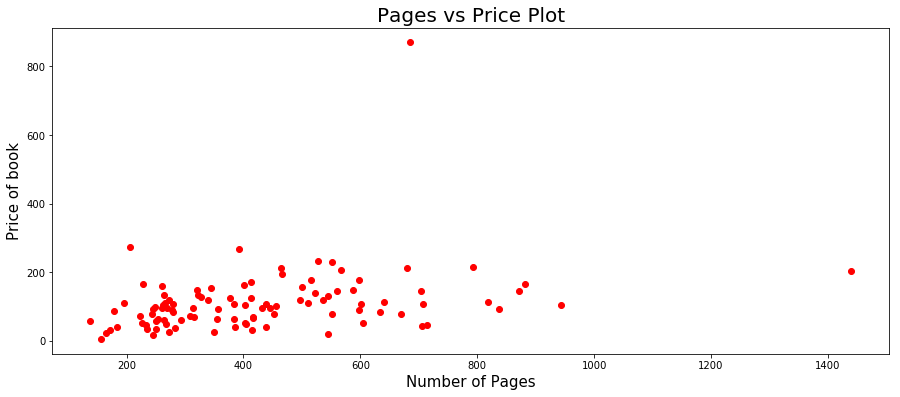

In [70]:
X = pages = df_data["Page_Count"]
Y = price = df_data["Lowest_Price_Amazon"]

plt.figure("ro", figsize=(15,6))
plt.title("Pages vs Price Plot", fontsize = 20)
plt.plot(X, Y, 'ro')
plt.xlabel('Number of Pages', fontsize=15)
plt.ylabel('Price of book', fontsize = 15)

#plt.text(0,-200,"Figure 1: Pages vs Price Plot", fontsize = 15)
plt.show()

### Fitting the regression line
A regression line was then fitted on the dataset. The line of best fit was found with the normal equation. 

The Beta0 and Beta 1 obtained:

In [9]:

X = np.array(X).reshape(-1, 1)  # values converts it into a numpy array
Y = np.array(Y).reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

from numpy.linalg import inv
def normal_equation(X, y):  
    X_transpose = X.T  
    theta = inv(X_transpose.dot(X)).dot(X_transpose).dot(y)  

    # normal equation  
    # theta_best = (X.T * X)^(-1) * X.T * y  
      
    return theta # returns a list  

X_b = np.c_[np.ones((len(df_data), 1)), X] # set bias term to 1 for each sample  
regression_params = normal_equation(X_b, Y)  
print("beta0: ", regression_params[0])
print("beta1: ", regression_params[1])



#First one is intercept --> each dollar increase in price is associated with an estimated increase in the number of pages of 1.3 pages
#Second one is slope --> maybe be interpreted as the predicted value of the response when x = 0. 
#This interpretation is only relevant when x = 0 is within the range of the values of x from the sample

beta0:  [51.22412279]
beta1:  [0.1407804]


In [10]:
def regression_predictor(regression_params, X):
    y_pred = regression_params[1] * X + regression_params[0]
    return y_pred

The regression line was plotted with the dataset. 

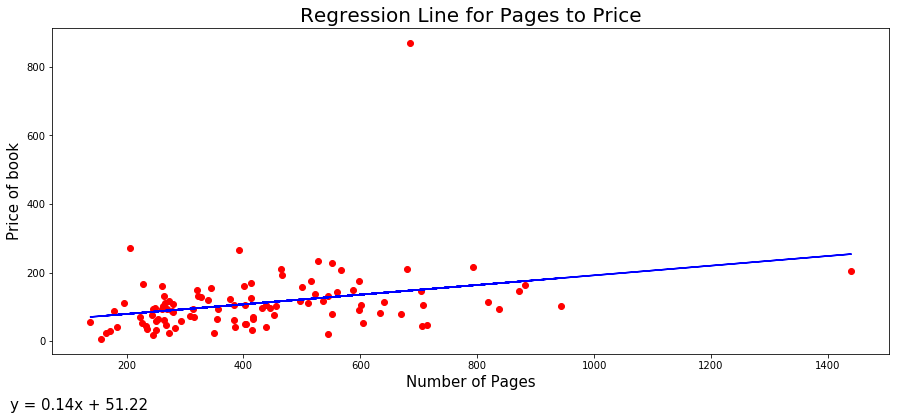

In [73]:
Y_pred = regression_predictor(regression_params, X)  # make predictions
plt.figure("ro", figsize=(15,6))
plt.title("Regression Line for Pages to Price", fontsize = 20)
#plt.scatter(X, Y)
plt.plot(X, Y, 'ro')
plt.plot(X, Y_pred, color='blue')
plt.xlabel('Number of Pages', fontsize = 15)
plt.ylabel('Price of book', fontsize = 15)
#plt.text(0,-200,"Figure 2: Regression Line for Pages vs Price", fontsize = 15);
plt.text(0,-200,"y = 0.14x + 51.22", fontsize = 15);


plt.show()

### Regression Line with outliers removed
Since outliers can significantly affect the line of best fit for a dataset, the outliers were removed from the data to explore the effects they have on the regression line.

In [12]:
#df_data.loc[df_data["Page_Count"] > 1200]

In [13]:
#df_data.loc[df_data['Lowest_Price_Amazon'] > 800]

In [14]:
#df_data.loc[df_data['Lowest_Price_Amazon'] > 800]
y_outlier_index = df_data[df_data['Lowest_Price_Amazon'] > 800].index.item()
#print(y_outlier_index)

In [15]:
#df_data.loc[df_data["Page_Count"] > 1200]
x_outlier_index = df_data[df_data["Page_Count"] > 1200].index.item()
#print(x_outlier_index)

In [58]:
#Outliers are saved in a seperate dataframe for plotting later
outliers = pd.DataFrame(columns=df_data.columns)
row1 = df_data.iloc[x_outlier_index]
row2 = df_data.iloc[y_outlier_index]
outliers = outliers.append(row1, ignore_index=True)
outliers = outliers.append(row2, ignore_index=True)

outliers

,Title,Page_Count,Lowest_Price_Amazon
0,Database System A practical approach to Design...,1440.0,203.95
1,Advanced Structural Analysis,685.0,869.56


In [17]:
#Remove obvious outliers 
df_data_no_outliers = df_data
df_data_no_outliers = df_data_no_outliers.drop(df_data.index[y_outlier_index])
df_data_no_outliers = df_data_no_outliers.drop(df_data.index[x_outlier_index])
df_data_no_outliers = df_data_no_outliers.reset_index(drop=True)
#df_data_no_outliers.head()

The correlation coefficient was recalculated. 

In [18]:
#Correlation after removing outliers
df_data_no_outliers["Page_Count"].corr(df_data_no_outliers["Lowest_Price_Amazon"])

0.31901743648981046

The dataset without the outliers was replotted.

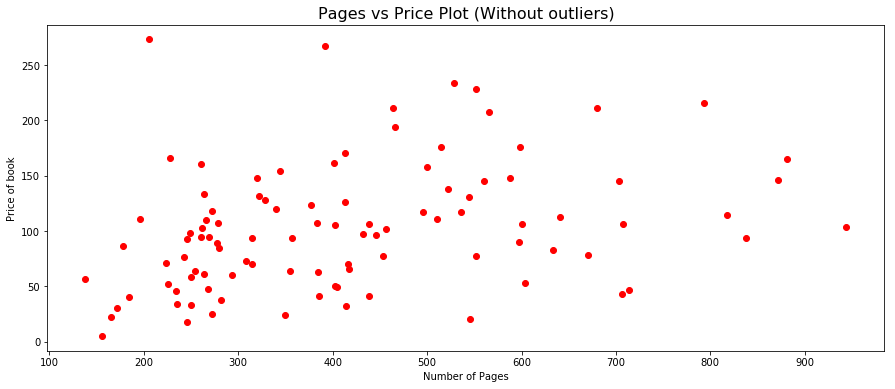

In [74]:
X_no_outliers = pages = df_data_no_outliers["Page_Count"]
Y_no_outliers = price = df_data_no_outliers["Lowest_Price_Amazon"]

plt.figure("ro", figsize=(15,6))
plt.title("Pages vs Price Plot (Without outliers)", fontsize = 16)
plt.plot(X_no_outliers, Y_no_outliers, 'ro')
plt.xlabel('Number of Pages')
plt.ylabel('Price of book');

#plt.text(0,-60,"Figure 3: Pages vs Price Plot (Outliers removed)", fontsize = 15)
plt.show()



Another regression line was fitted on the dataset with outliers removed. 

The new Beta0 and Beta 1 obtained:

In [20]:
X_no_outliers = np.array(X_no_outliers).reshape(-1, 1)  # values converts it into a numpy array
Y_no_outliers = np.array(Y_no_outliers).reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column


X_b_no = np.c_[np.ones((len(df_data_no_outliers), 1)), X_no_outliers] # set bias term to 1 for each sample  
regression_params_no_outliers = normal_equation(X_b_no, Y_no_outliers)

print("beta0: ", regression_params_no_outliers[0])
print("beta1: ", regression_params_no_outliers[1])

beta0:  [62.16139144]
beta1:  [0.09845031]


The new regression line was plotted with the dataset with outliers removed. 

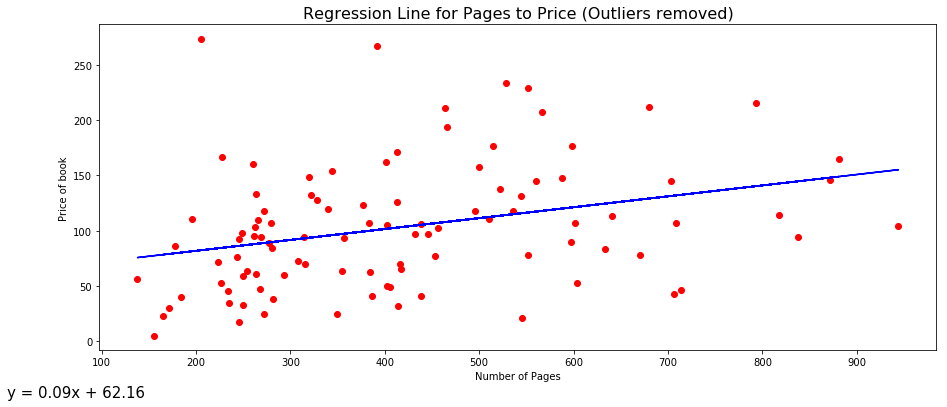

In [78]:
Y_pred_no_outliers = regression_predictor(regression_params_no_outliers, X_no_outliers)  # make predictions
plt.figure("ro", figsize=(15,6))
#plt.scatter(X, Y)
plt.title("Regression Line for Pages to Price (Outliers removed)", fontsize = 16)
plt.plot(X_no_outliers, Y_no_outliers, 'ro')
plt.plot(X_no_outliers, Y_pred_no_outliers, color='blue')
plt.xlabel('Number of Pages')
plt.ylabel('Price of book')

#plt.text(0,-60,"Figure 4: Regression Line (Without outliers)", fontsize = 15)
plt.text(0,-50,"y = 0.09x + 62.16", fontsize = 15);



plt.show()

Both regression lines were plotted with the data and outliers.

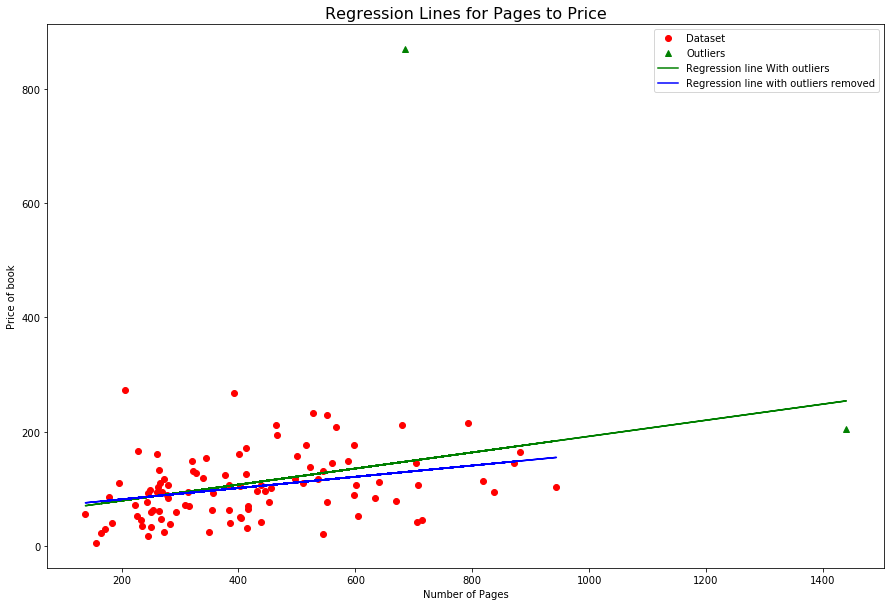

In [83]:
plt.figure("ro", figsize=(15,10))
#plt.scatter(X, Y)
plt.title("Regression Lines for Pages to Price", fontsize = 16)

X_outlier = outliers["Page_Count"]
Y_outlier = outliers["Lowest_Price_Amazon"]

plt.plot(X_no_outliers, Y_no_outliers, 'ro', label = "Dataset")
plt.plot(X_outlier, Y_outlier, "g^", label = "Outliers")
plt.plot(X, Y_pred, color='green', label="Regression line With outliers")
plt.plot(X_no_outliers, Y_pred_no_outliers, color='blue', label= "Regression line with outliers removed")
plt.legend()
plt.xlabel('Number of Pages')
plt.ylabel('Price of book')
#plt.text(0,-125,"Figure 5: Plot of both regression lines", fontsize = 15)
plt.show()

The standard error for the two regression lines are calculated:

In [23]:
def standard_error(x_input, y_input, y_pred):
    x_mean = np.sum(x_input) / len(x_input)

    x_difference_term = 0.0
    for i in range(len(x_input)):
        x_difference_term += (x_input[i]-x_mean)**2

    error_sum = 0.0
    for i in range(len(y_input)):
        error_sum = (y_input[i] - y_pred[i])**2
        
    top = error_sum / (len(x_input)-2)
    #print(top[0])
    #print(x_difference_term[0])
    return np.sqrt(top[0]/x_difference_term[0]) #standard error

In [24]:
SE = standard_error(X, Y, Y_pred)
SE_without_outliers = standard_error(X_no_outliers, Y_no_outliers, Y_pred_no_outliers)

print("Standard Error with all data:", SE)
print("Standard Error with outliers removed", SE_without_outliers)



Standard Error with all data: 0.0013389410721566062
Standard Error with outliers removed 0.0015903289779760391


The 95% confidence interval for beta1 is determined

In [85]:
import scipy.stats as stats

dof = len(X_no_outliers) - 2

#95% confidence interval for beta1
t_n2 = stats.t.ppf(q=0.975,  # Quantile to check
            df=dof)  # Degrees of freedom"""
t_n2 = float(t_n2)
print("t value:", t_n2)
#print(t_n2, type(t_n2)) 

beta1 = float(regression_params_no_outliers[1])
#print(type(beta1))

print(beta1)
print(t_n2*SE)

c_interval_min = beta1 - t_n2*SE
c_interval_max = beta1 + t_n2*SE

print("The Confidence Interval is:(",c_interval_min, ",",c_interval_max,")")

t value: 1.984467454426692
0.0984503094160129
0.003155956098625113
The Confidence Interval is:( 0.0952943533173878 , 0.10160626551463801 )


There is a 95% confidence that an increase in one page is associated with a mean increase of between 1 and 10 cents on the book's price.  

If there is no relationship between the number of pages in a book and the book's price, beta1 will be equal to zero. 

A hypothesis test was conducted on beta1 to determine if there is a significant positive association. The values used to calculate beta1 and standard error had the 2 outliers removed to avoid the results being skewed by the outliers. 

To setup the hypothesis test:

    H0: B1 = 0
    Ha: B1 =/= 0


In [26]:
b1 = float(regression_params_no_outliers[1])
SE = standard_error(X_no_outliers, Y_no_outliers, Y_pred_no_outliers)

print("Beta1:", b1)
print("Standard error:", SE)

t = b1/SE
print("The t value can be calculated as beta1 divided by the standard error.")
print("t value:", t)

dof = len(X_no_outliers) - 2
print("The degree of freedom is:", dof)

"""stats.t.ppf(q=0.025,  # Quantile to check
            df=dof)  # Degrees of freedom

stats.t.ppf(q=0.975,  # Quantile to check
            df=dof)  # Degrees of freedom"""


T_test = stats.t.cdf(x = t,      # T-test statistic
               df= dof) 
      
print("T test value:", T_test)
           
p_value = 2*(1-(T_test))
print("P value is:", p_value)
print()

if (p_value < 0.001):
    print("Since the p_value is less than 0.001,")
    print ("H0 is rejected.")
else:
    print("H0 is accepted. The p_value is greater than 0.001.")
    

Beta1: 0.0984503094160129
Standard error: 0.0015903289779760391
The t value can be calculated as beta1 divided by the standard error.
t value: 61.90562504954633
The degree of freedom is: 98
T test value: 1.0
P value is: 0.0

Since the p_value is less than 0.001,
H0 is rejected.


Based on the hypothesis test on b1, it can be concluded that there is a significant positive association between the number of pages and price of the book.

In [ ]:
%%html
<style>
div.input {
    display:none;
}
</style>


## References:

1) http://reliawiki.org/index.php/Simple_Linear_Regression_Analysis#Fitted_Regression_Line

2)
http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-24.html